In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
#import pylab as plt
import numpy as np
import skimage.io
plt.rcParams['figure.figsize'] = (12, 12)
import rbepwt

In [12]:
img_codename = 'gradient64-easypath-bior4.4-12levels'
#img_codename = 'house256-gradpath-bior4.4-16levels'
imgpath = '../pickled/' + img_codename


--DECODING: finished working on level 12 

--DECODING: finished working on level 11 

--DECODING: finished working on level 10 

--DECODING: finished working on level 9 

--DECODING: finished working on level 8 

--DECODING: finished working on level 7 

--DECODING: finished working on level 6 

--DECODING: finished working on level 5 

--DECODING: finished working on level 4 

--DECODING: finished working on level 3 

--DECODING: finished working on level 2 

--DECODING: finished working on level 1 

--DECODING: finished working on level 12 

--DECODING: finished working on level 11 

--DECODING: finished working on level 10 

--DECODING: finished working on level 9 

--DECODING: finished working on level 8 

--DECODING: finished working on level 7 

--DECODING: finished working on level 6 

--DECODING: finished working on level 5 

--DECODING: finished working on level 4 

--DECODING: finished working on level 3 

--DECODING: finished working on level 2 

--DECODING: finished workin

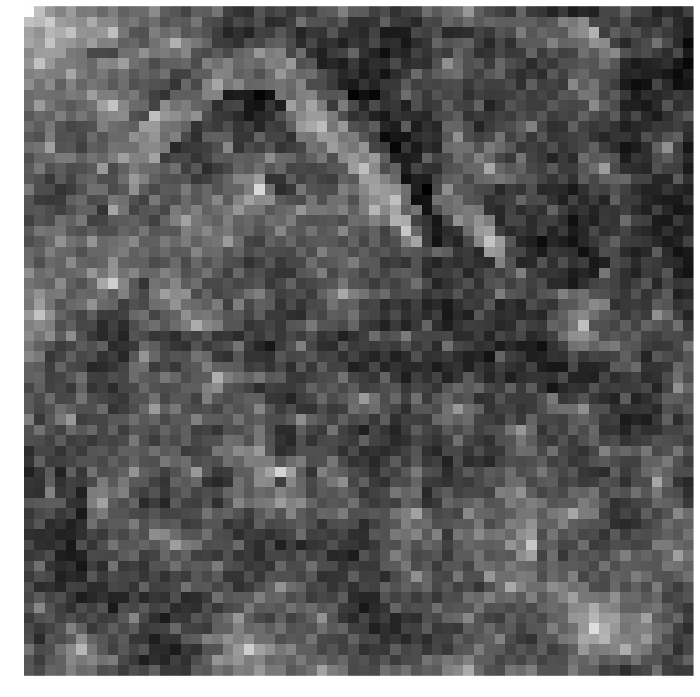

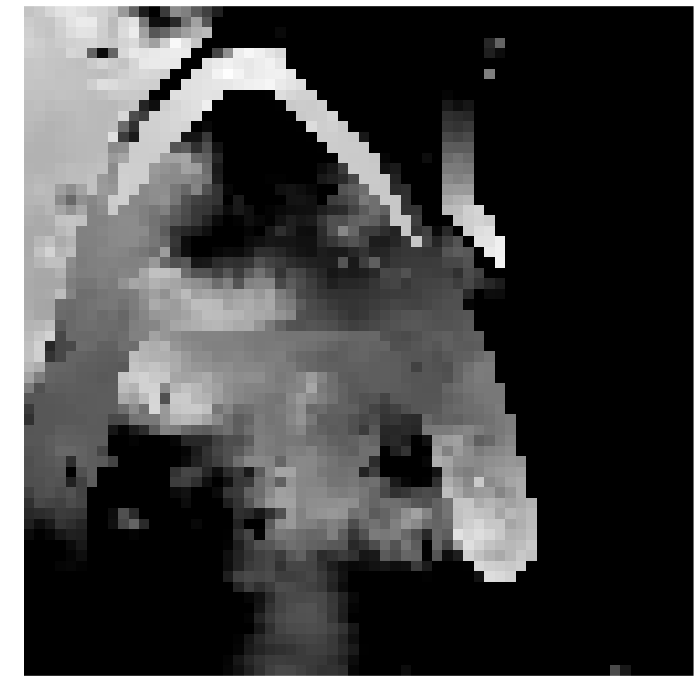

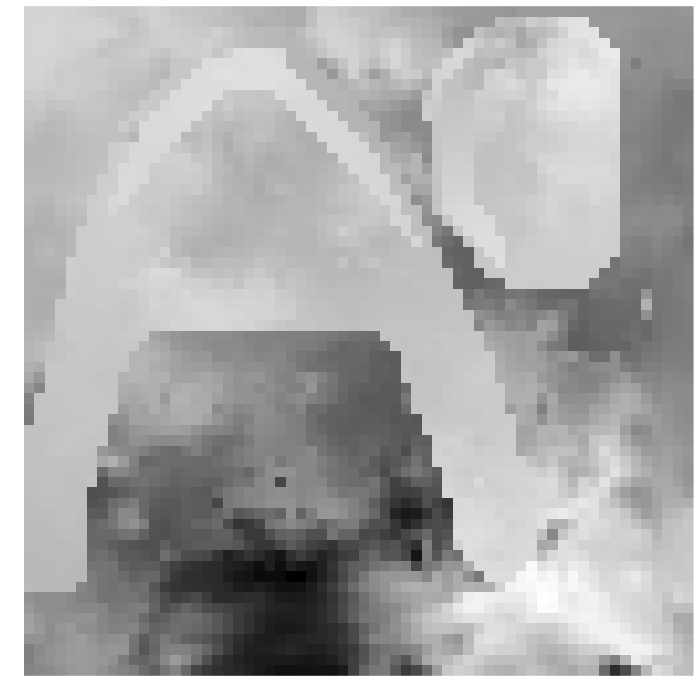

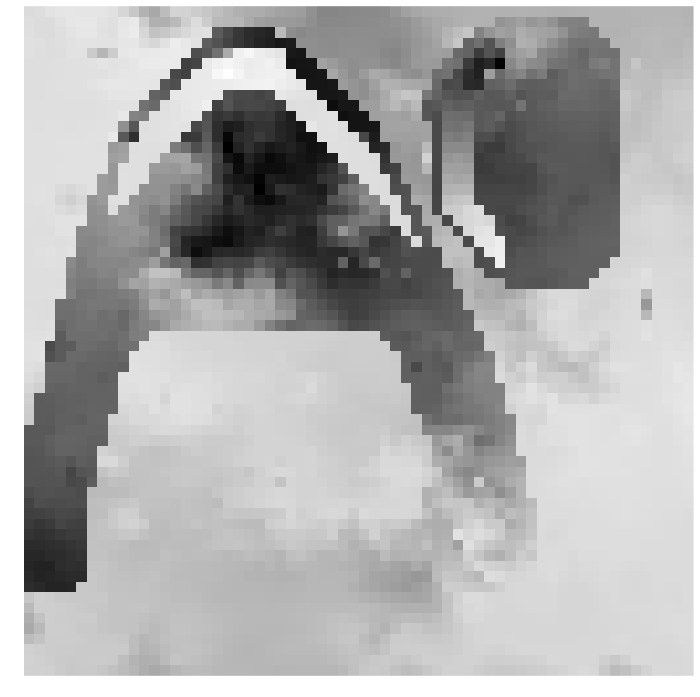

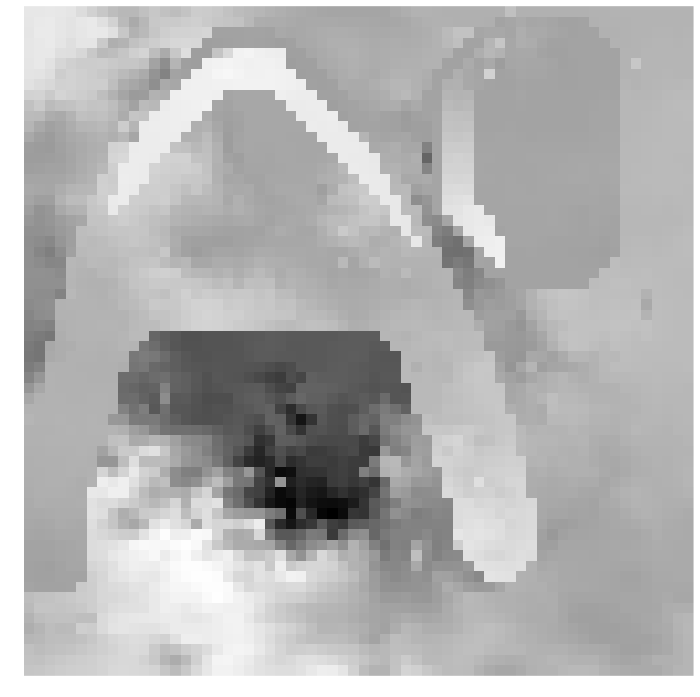

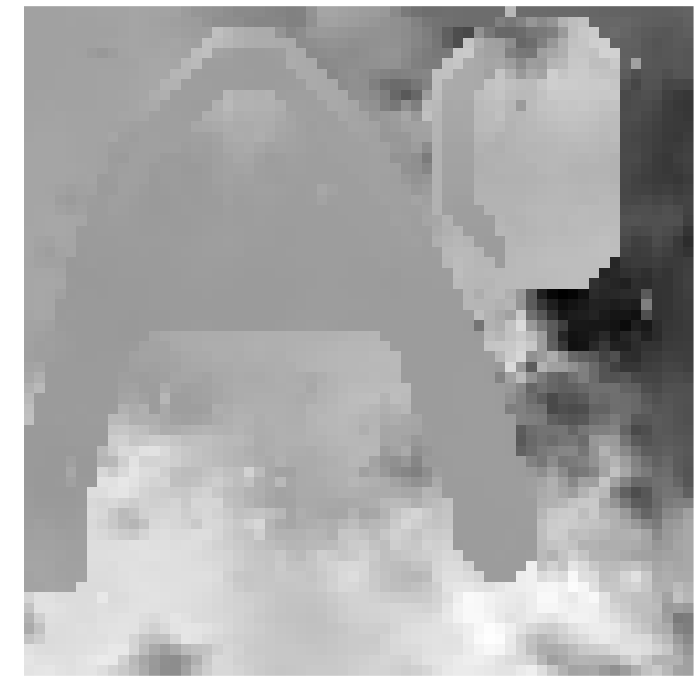

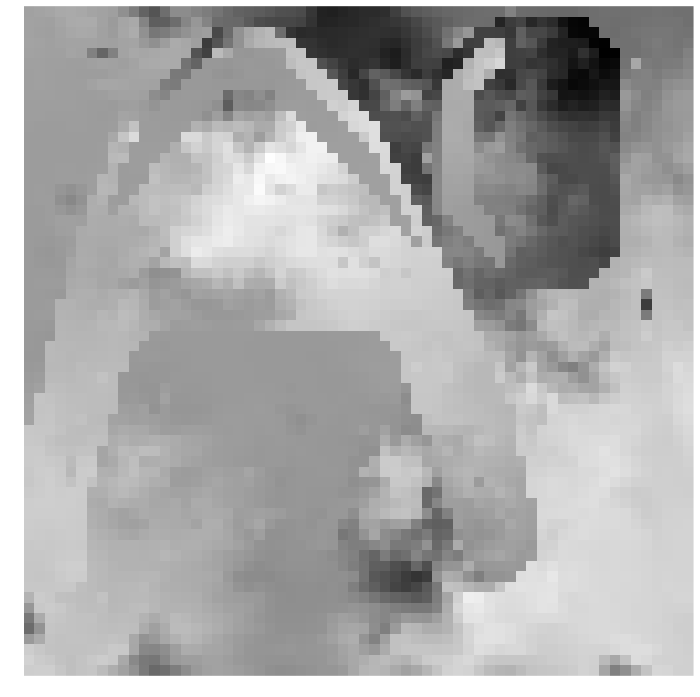

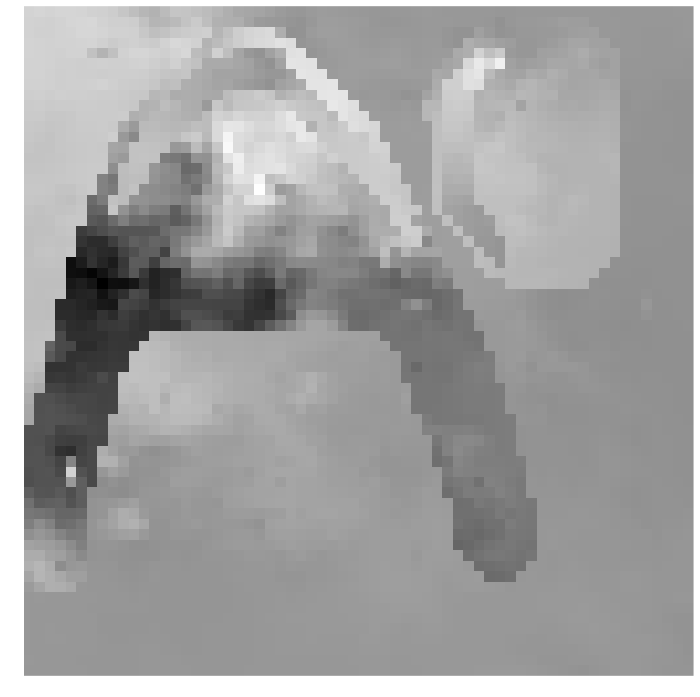

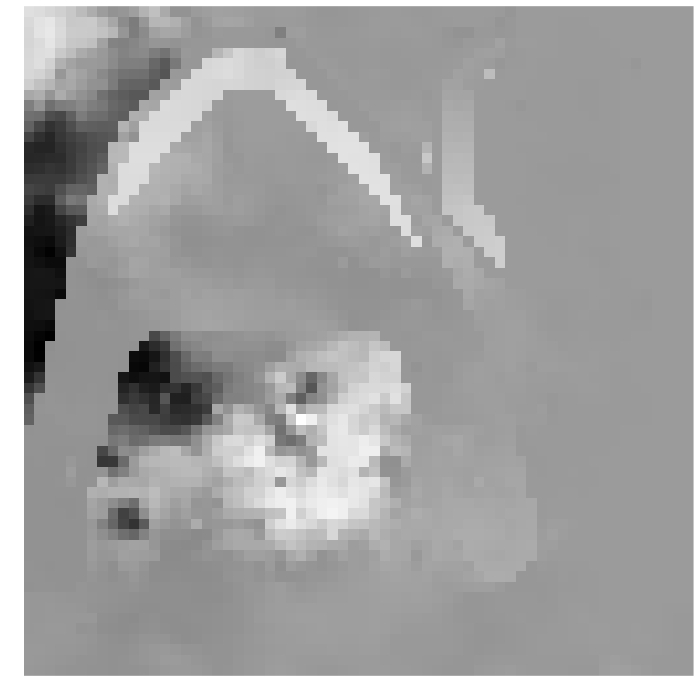

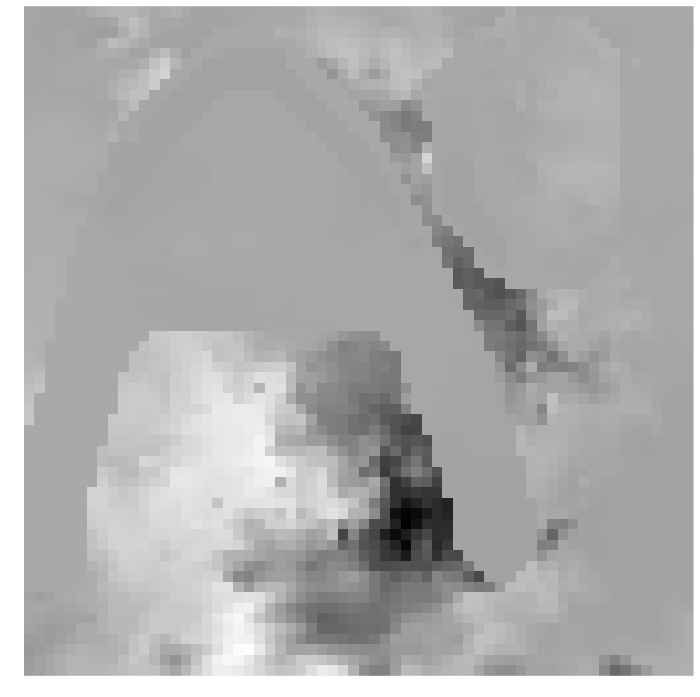

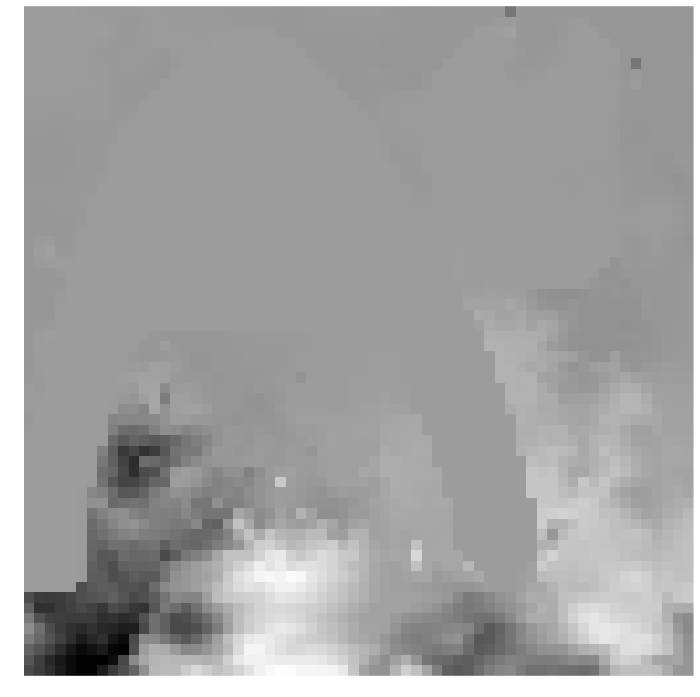

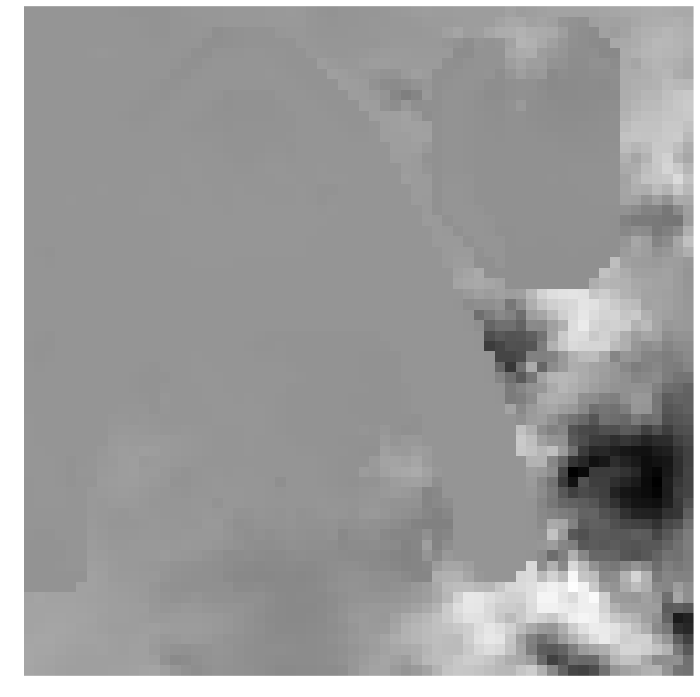

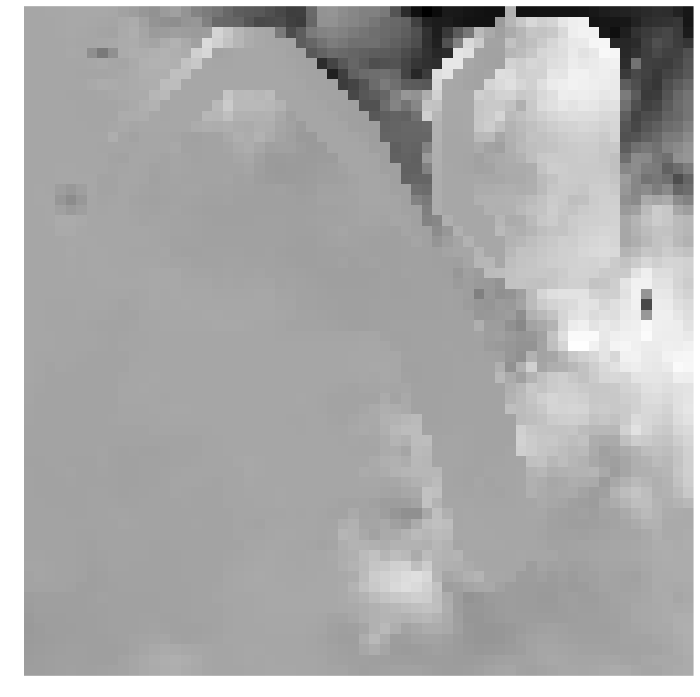

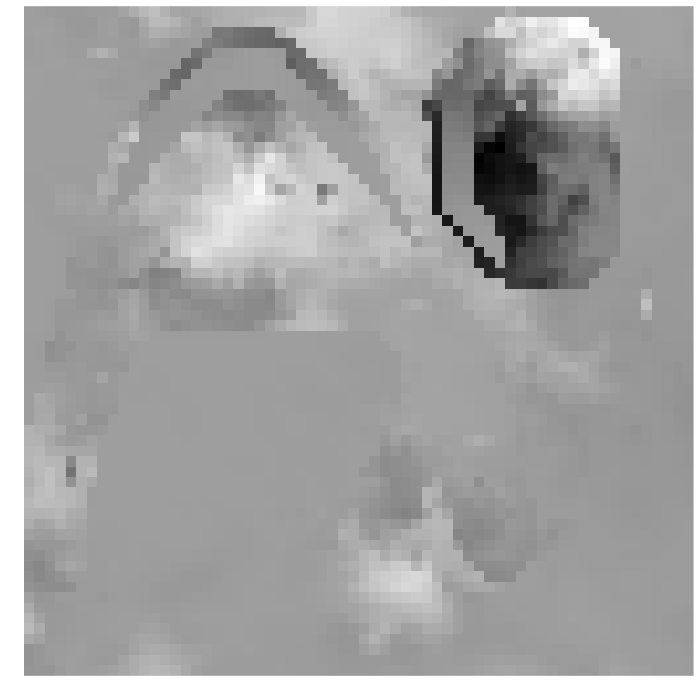

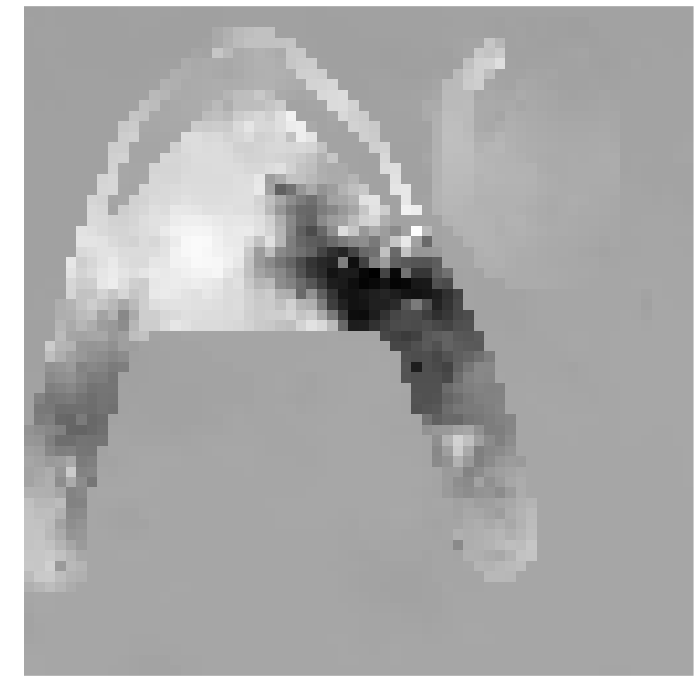

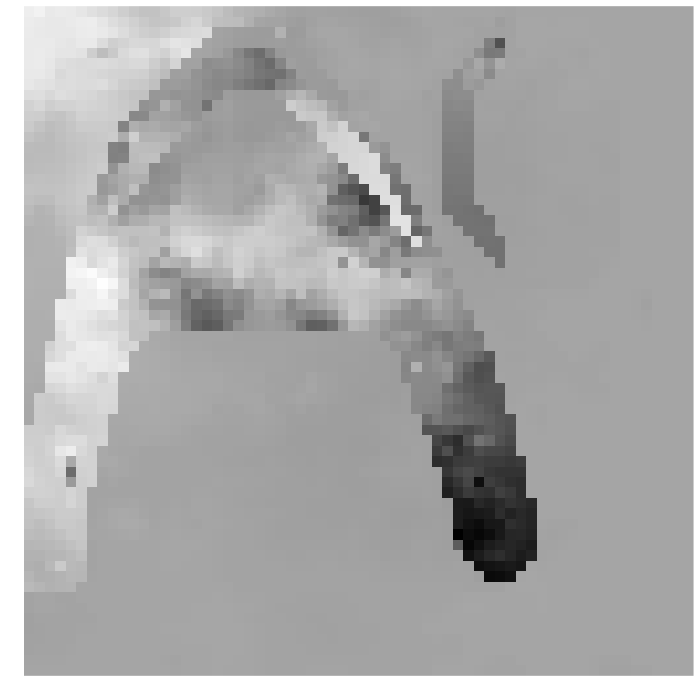

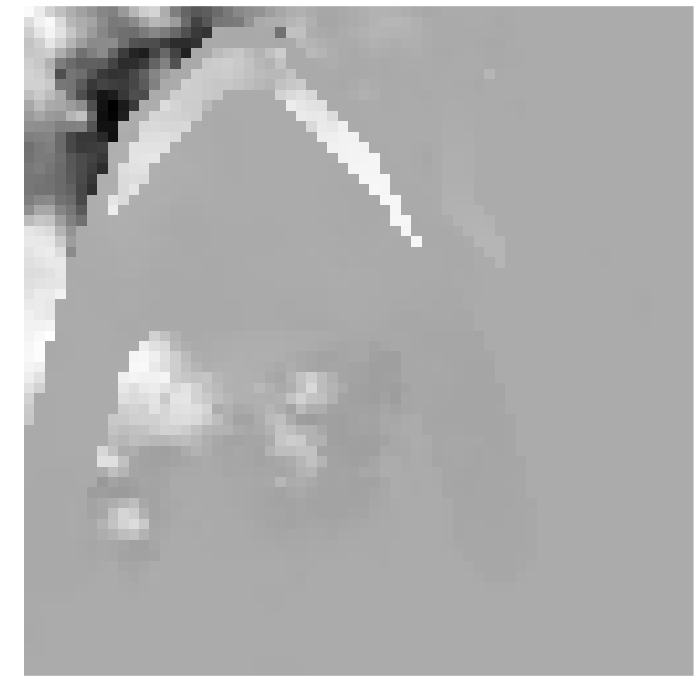

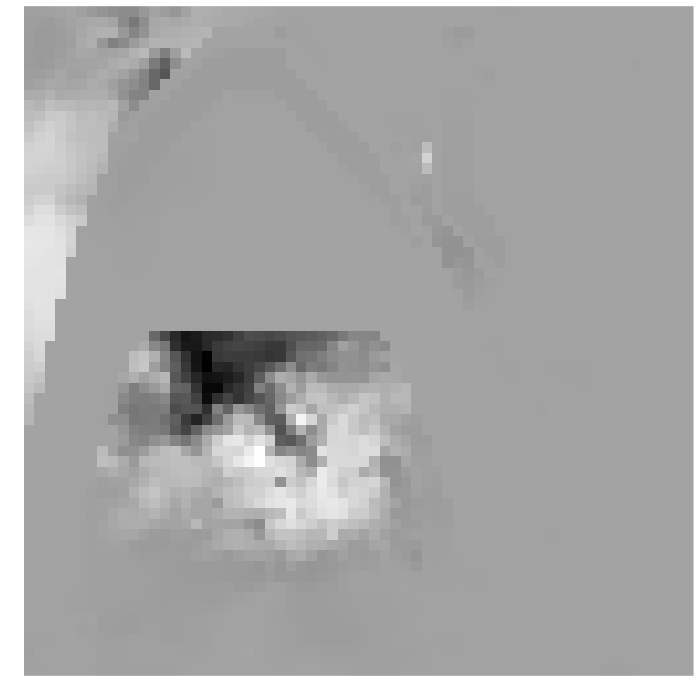

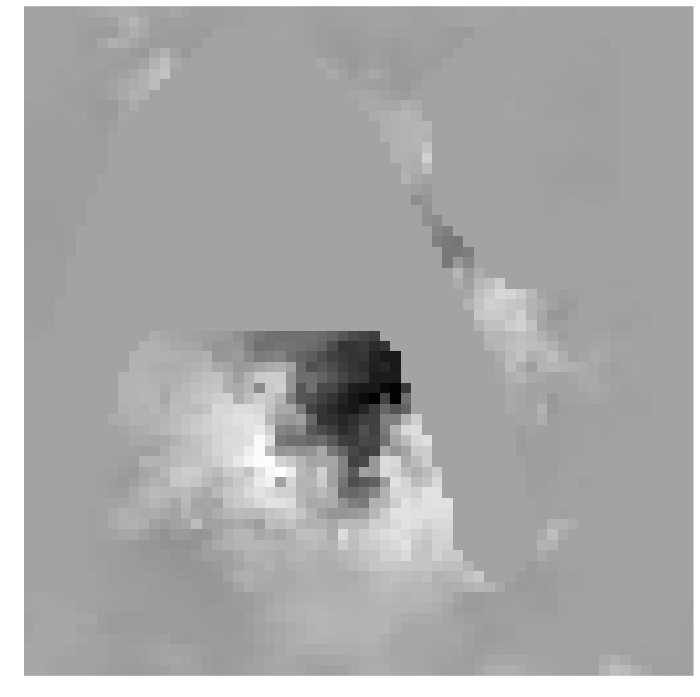

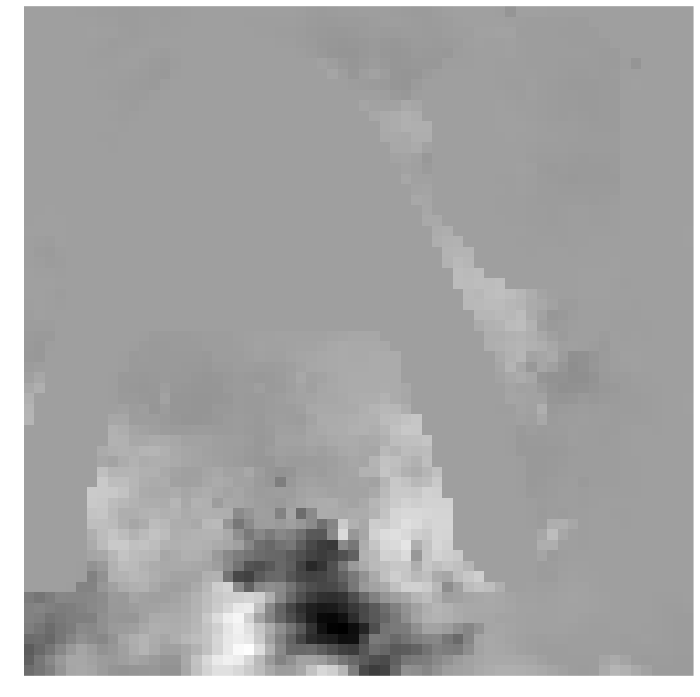

In [14]:
nbasis = 20
savedir = '../basis_elements/'

img = rbepwt.Image()
img.load_pickle(imgpath)
prevlen = 0
curlevel = img.rbepwt.levels + 1
approxvec = img.rbepwt.region_collection_at_level[curlevel].values
approx = True
for i in range(nbasis):
    img = rbepwt.Image()
    img.load_pickle(imgpath)
    for lev in range(1,img.rbepwt.levels+1):
        img.rbepwt.wavelet_details[lev] = np.zeros_like(img.rbepwt.wavelet_details[lev])
    img.rbepwt.region_collection_at_level[curlevel].values = np.zeros_like(approxvec)
    if i == len(approxvec) and approx:
        approx = False
        prevlen = len(approxvec)
        curlevel -= 1
    curidx = i - prevlen
    if approx:
        img.rbepwt.region_collection_at_level[curlevel].values[i] = 1
    else:
        #print("second",curidx)
        #print("first",i,curlevel,prevlen)
        img.rbepwt.wavelet_details[curlevel][curidx] = 1
        if curidx + 1== len(img.rbepwt.wavelet_details[curlevel]):
            prevlen += len(img.rbepwt.wavelet_details[curlevel])
            curlevel -= 1
    img.decode_rbepwt()
    #img.show_decoded(title='Basis element %d' % i) 
    img.save_decoded(title=None,filepath=savedir+img_codename+'-basis'+str(i)+'.png')     

/Users/renato/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


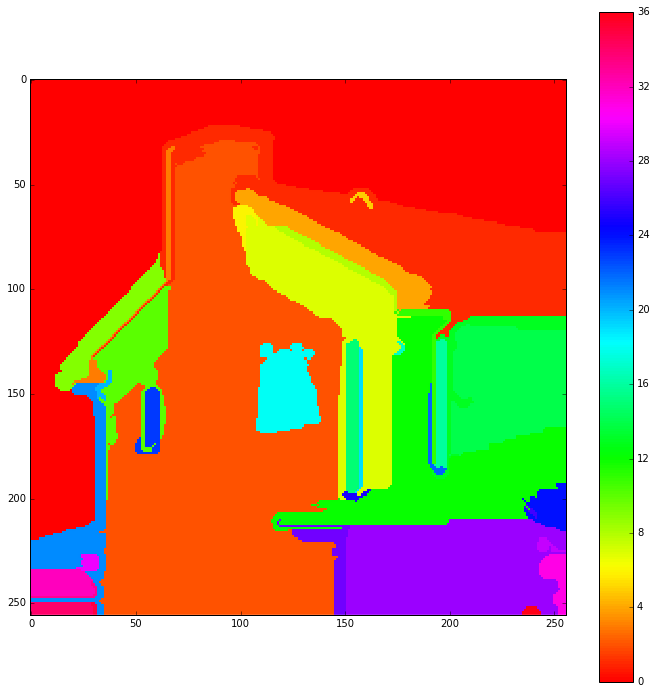

In [12]:
img.show_segmentation()